In [1]:
!gdown --id 1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:132: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1v36q7Efz0mprjAv4g6TkQM2YlDKdqOuy
To: /content/IMDB-Dataset.csv
100% 66.2M/66.2M [00:02<00:00, 23.2MB/s]


In [29]:
!pip install -q nltk
!pip install -q contractions
!pip install -q scikit-learn
!pip install -q bs4
!pip install -q seaborn
!pip install -q pandas
!pip install -q matplotlib


In [3]:
# Load dataset
import pandas as pd

DATASET_PATH = "/content/IMDB-Dataset.csv"
dataset = pd.read_csv(DATASET_PATH)

In [4]:
dataset.head(20)

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
5,"Probably my all-time favorite movie, a story o...",positive
6,I sure would like to see a resurrection of a u...,positive
7,"This show was an amazing, fresh & innovative i...",negative
8,Encouraged by the positive comments about this...,negative
9,If you like original gut wrenching laughter yo...,positive


In [5]:
dataset.describe()

,review,sentiment
count,50000,50000
unique,49582,2
top,Loved today's show!!! It was a variety and not...,positive
freq,5,25000


In [ ]:
dataset.duplicates()

In [6]:
dataset.drop_duplicates()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive
...,...,...
49995,I thought this movie did a down right good job...,positive
49996,"Bad plot, bad dialogue, bad acting, idiotic di...",negative
49997,I am a Catholic taught in parochial elementary...,negative
49998,I'm going to have to disagree with the previou...,negative


In [7]:
dataset["review"][0]

"One of the other reviewers has mentioned that after watching just 1 Oz episode you'll be hooked. They are right, as this is exactly what happened with me.<br /><br />The first thing that struck me about Oz was its brutality and unflinching scenes of violence, which set in right from the word GO. Trust me, this is not a show for the faint hearted or timid. This show pulls no punches with regards to drugs, sex or violence. Its is hardcore, in the classic use of the word.<br /><br />It is called OZ as that is the nickname given to the Oswald Maximum Security State Penitentary. It focuses mainly on Emerald City, an experimental section of the prison where all the cells have glass fronts and face inwards, so privacy is not high on the agenda. Em City is home to many..Aryans, Muslims, gangstas, Latinos, Christians, Italians, Irish and more....so scuffles, death stares, dodgy dealings and shady agreements are never far away.<br /><br />I would say the main appeal of the show is due to the fa

In [8]:
import re
import string
import nltk
nltk.download('stopwords')
nltk.download('wordnet')
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from bs4 import BeautifulSoup
import contractions

stop = set(stopwords.words('english'))

def expand_contractions(text):
  return contractions.fix(text)

def preprocessing_text(text):
    wl = WordNetLemmatizer()
    soup = BeautifulSoup(text, "html.parser")
    text = soup.get_text()
    text = expand_contractions(text)
    # emoji_clean = re.compile("["
    #                           u"\U0001F600 -\U0001F64F"
    #                           u"\U0001F300 -\U0001F5FF"
    #                           u"\U0001F680 -\U0001F6FF"
    #                           u"\U0001F1E0 -\U0001F1FF"
    #                           u"\U00002702 -\U000027B0"
    #                           u"\U000024C2 -\U0001F251" "]+",
    #                           flags=re.UNICODE)
    # text = re.sub(r'emoji_clean', r'', text)
    text = re.sub(r'[^\w\s]', '', text, re.UNICODE)
    text = re.sub(r'\.(?=\S)', '. ', text)
    text = re.sub(r'http\S+', '', text)
    text = "".join([word.lower() for word in text if word not in string.punctuation])
    text = " ".join([wl.lemmatize(word) for word in text.split() if not word in stop])
    return text

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [9]:
dataset['review'] = dataset['review'].apply(preprocessing_text)

<ipython-input-8-085384e13b4d>:18: MarkupResemblesLocatorWarning: The input looks more like a filename than markup. You may want to open this file and pass the filehandle into Beautiful Soup.
  soup = BeautifulSoup(text, "html.parser")


In [10]:
preprocessing_text(dataset['review'][0])

'one reviewer mentioned watching 1 oz episode hooked right exactly happened methe first thing struck oz brutality unflinching scene violence set right word go trust show faint hearted timid show pull punch regard drug sex violence hardcore classic use wordit called oz nickname given oswald maximum security state penitentary focus mainly emerald city experimental section prison cell glass front face inwards privacy high agenda city home manyaryans muslim gangsta latino christian italian irish moreso scuffle death stare dodgy dealing shady agreement never far awayi would say main appeal show due fact go show would dare forget pretty picture painted mainstream audience forget charm forget romance oz mess around first episode ever saw struck nasty surreal could say ready watched developed taste oz got accustomed high level graphic violence violence injustice crooked guard sold nickel inmate kill order get away well mannered middle class inmate turned prison bitch due lack street skill pris

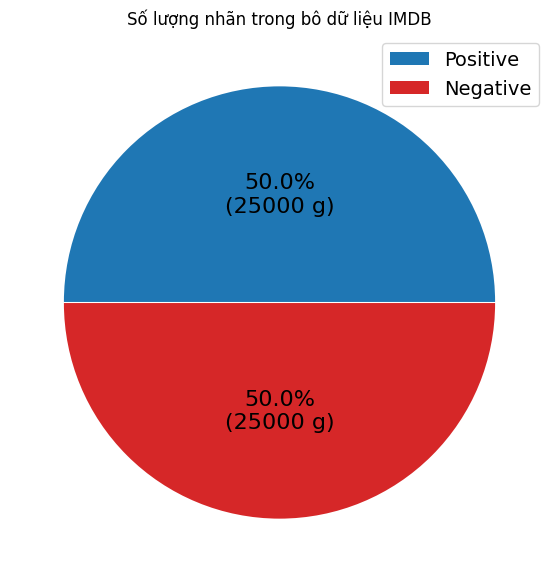

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def func(pct, allvalues):
  absolute = int(pct/ 100.*np.sum(allvalues))
  return "{:.1f}%\n({:d} g)".format(pct, absolute)

freq_pos = len(dataset[dataset['sentiment'] == 'positive'])
freq_neg = len(dataset[dataset['sentiment'] == 'negative'])

data = [freq_pos, freq_neg]
labels = ['Positive', 'Negative']

pie, ax = plt.subplots(figsize=[11,7])
plt.pie(x=data, autopct=lambda pct: func(pct, data), explode=[0.0025]*2,
        pctdistance=0.5, colors=[sns.color_palette()[0], 'tab:red'], textprops={'fontsize': 16})
labels = [r'Positive', r'Negative']
plt.legend(labels, loc='best', prop={'size': 14})
pie.savefig('pie.png')
plt.title("Số lượng nhãn trong bô dữ liệu IMDB")
plt.show()


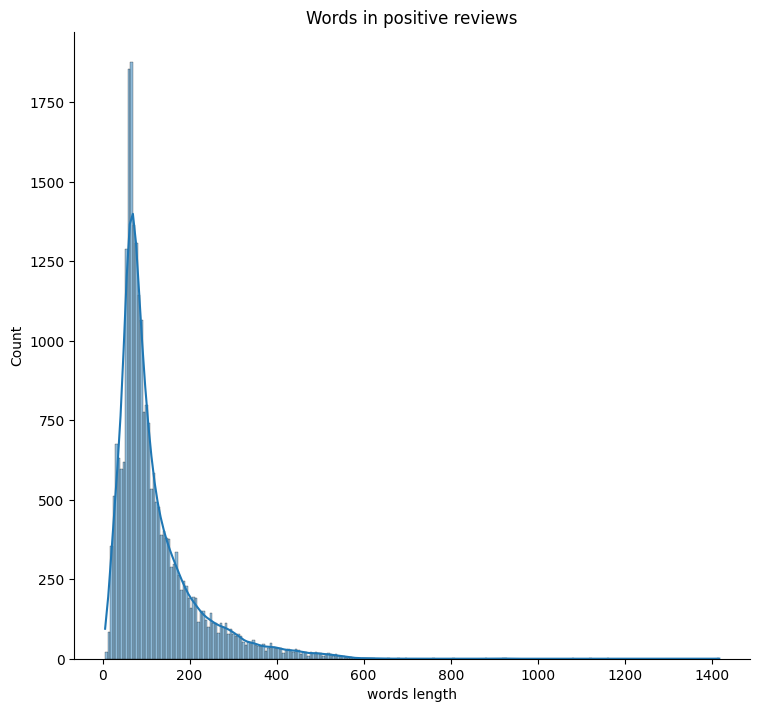

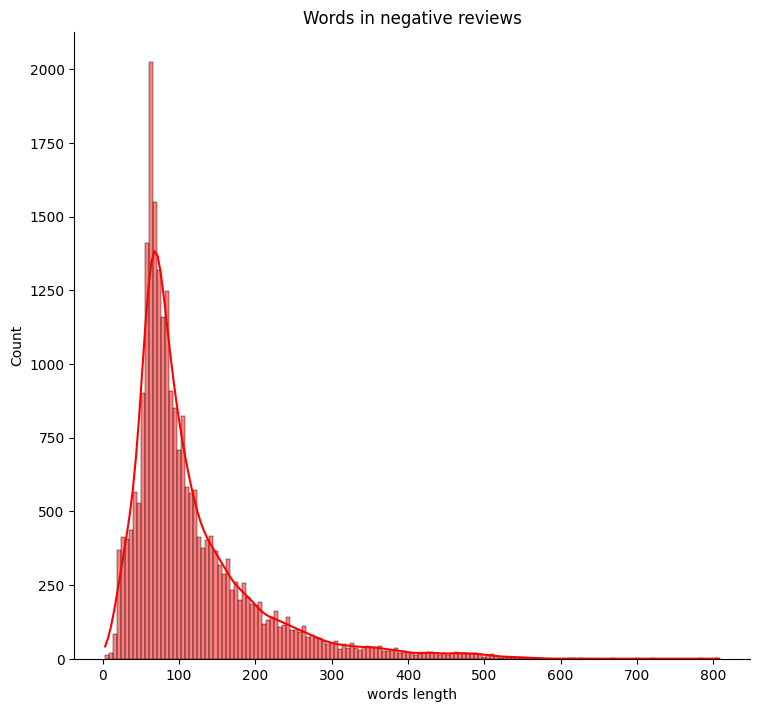

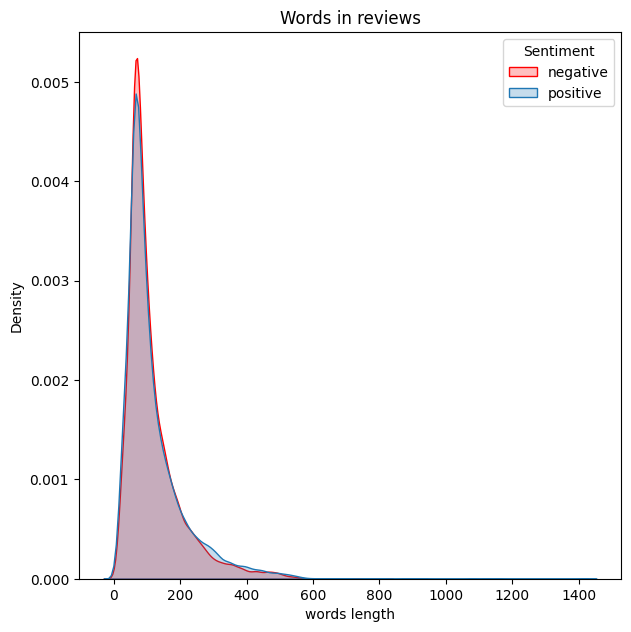

In [12]:
words_len = dataset['review'].str.split().map(lambda x: len(x))
dataset_temp = dataset.copy()
dataset_temp["words length"] = words_len

hist_positive = sns.displot(
    data=dataset_temp[dataset_temp['sentiment'] == 'positive'],
    x="words length", hue='sentiment', kde = True,
    height=7, aspect=1.1, legend=False
).set(title="Words in positive reviews")
plt.show(hist_positive)

hist_negative = sns.displot(
    data = dataset_temp[dataset_temp['sentiment'] == 'negative'],
    x='words length', hue='sentiment', kde = True,
    height=7, aspect=1.1, legend=False, palette=["red"]
).set(title="Words in negative reviews")

plt.show(hist_negative)

plt.figure(figsize=(7,7.1))
kernel_distribustion_number_words_plot = sns.kdeplot(
    data=dataset_temp, x='words length', hue='sentiment',
    fill=True, palette=[sns.color_palette()[0], 'red']
).set(title='Words in reviews')
plt.legend(title="Sentiment", labels=['negative', 'positive'])
plt.show(kernel_distribustion_number_words_plot)

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder

X = dataset['review']
y = dataset['sentiment']
label_encoder = LabelEncoder()
y_data = label_encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_data, test_size=0.2, random_state=42)


In [14]:
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
tfidf_vectorizer.fit(X_train, y_train)

X_train_encoded = tfidf_vectorizer.transform(X_train)
X_test_encoded = tfidf_vectorizer.transform(X_test)

In [34]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score

dt_model = DecisionTreeClassifier(random_state=42, criterion='entropy')
rf_model = RandomForestClassifier(random_state=42)
ada_model = AdaBoostClassifier(random_state=42)
gb_model = GradientBoostingClassifier(random_state=42)
xgb_model = XGBClassifier(random_state=42)

dt_model.fit(X_train_encoded, y_train)
rf_model.fit(X_train_encoded, y_train)
ada_model.fit(X_train_encoded, y_train)
gb_model.fit(X_train_encoded, y_train)

dt_pred = dt_model.predict(X_test_encoded)
rf_pred = rf_model.predict(X_test_encoded)
ada_pred = ada_model.predict(X_test_encoded)
gb_pred = gb_model.predict(X_test_encoded)

dt_score = accuracy_score(y_test, dt_pred)
rf_score = accuracy_score(y_test, rf_pred)
ada_score = accuracy_score(y_test, ada_pred)
gb_score = accuracy_score(y_test, gb_pred)

In [35]:
print("Decision Tree Accuracy:", dt_score)
print("Random Forest Accuracy:", rf_score)
print("AdaBoost Accuracy:", ada_score)
print("Gradient Boosting Accuracy:", gb_score)


Decision Tree Accuracy: 0.7295
Random Forest Accuracy: 0.8493
AdaBoost Accuracy: 0.807
Gradient Boosting Accuracy: 0.8146
